In [56]:
import pandas as pd

#Reading the csv file
data = pd.read_csv('C:/Users/HP/Desktop/Data/NormalAndAngel_man.csv')

In [57]:
data = data.drop(columns=['Unnamed: 0'])

In [58]:
import numpy as np 
import sklearn.model_selection

data = data[['chin_0_x','chin_0_y','chin_1_x','chin_1_y','chin_2_x','chin_2_y','chin_3_x','chin_3_y','chin_4_x','chin_4_y','chin_5_x','chin_5_y','chin_6_x','chin_6_y','chin_7_x','chin_7_y','chin_8_x','chin_8_y','chin_9_x','chin_9_y','chin_10_x','chin_10_y','chin_11_x','chin_11_y','chin_12_x','chin_12_y','chin_13_x','chin_13_y','chin_14_x','chin_14_y','chin_15_x','chin_15_y','chin_16_x','chin_16_y','left_eyebrow_0_x','left_eyebrow_0_y','left_eyebrow_1_x','left_eyebrow_1_y','left_eyebrow_2_x','left_eyebrow_2_y','left_eyebrow_3_x','left_eyebrow_3_y','left_eyebrow_4_x','left_eyebrow_4_y','right_eyebrow_0_x','right_eyebrow_0_y','right_eyebrow_1_x','right_eyebrow_1_y','right_eyebrow_2_x','right_eyebrow_2_y','right_eyebrow_3_x','right_eyebrow_3_y','right_eyebrow_4_x','right_eyebrow_4_y','nose_bridge_0_x','nose_bridge_0_y','nose_bridge_1_x','nose_bridge_1_y','nose_bridge_2_x','nose_bridge_2_y','nose_bridge_3_x','nose_bridge_3_y','nose_tip_0_x','nose_tip_0_y','nose_tip_1_x','nose_tip_1_y','nose_tip_2_x','nose_tip_2_y','nose_tip_3_x','nose_tip_3_y','nose_tip_4_x','nose_tip_4_y','left_eye_0_x','left_eye_0_y','left_eye_1_x','left_eye_1_y','left_eye_2_x','left_eye_2_y','left_eye_3_x','left_eye_3_y','left_eye_4_x','left_eye_4_y','left_eye_5_x','left_eye_5_y','right_eye_0_x','right_eye_0_y','right_eye_1_x','right_eye_1_y','right_eye_2_x','right_eye_2_y','right_eye_3_x','right_eye_3_y','right_eye_4_x','right_eye_4_y','right_eye_5_x','right_eye_5_y','top_lip_0_x','top_lip_0_y','top_lip_1_x','top_lip_1_y','top_lip_2_x','top_lip_2_y','top_lip_3_x','top_lip_3_y','top_lip_4_x','top_lip_4_y','top_lip_5_x','top_lip_5_y','top_lip_6_x','top_lip_6_y','top_lip_7_x','top_lip_7_y','top_lip_8_x','top_lip_8_y','top_lip_9_x','top_lip_9_y','top_lip_10_x','top_lip_10_y','top_lip_11_x','top_lip_11_y','bottom_lip_0_x','bottom_lip_0_y','bottom_lip_1_x','bottom_lip_1_y','bottom_lip_2_x','bottom_lip_2_y','bottom_lip_3_x','bottom_lip_3_y','bottom_lip_4_x','bottom_lip_4_y','bottom_lip_5_x','bottom_lip_5_y','bottom_lip_6_x','bottom_lip_6_y','bottom_lip_7_x','bottom_lip_7_y','bottom_lip_8_x','bottom_lip_8_y','bottom_lip_9_x','bottom_lip_9_y','bottom_lip_10_x','bottom_lip_10_y','bottom_lip_11_x','bottom_lip_11_y','Angel_man']]

predict = 'Angel_man'

X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2)


In [59]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(x_train, y_train) 
## And score it on your testing data.
rf.score(x_test, y_test)

0.9958893871449925

In [60]:
#convert numpy x_train to a dataframe
d = pd.DataFrame(data=x_train)

In [61]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = d.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [62]:
#L'importance des features 
feature_importances

,importance
93,0.055982
95,0.049487
81,0.043590
85,0.042557
89,0.036113
...,...
111,0.000471
27,0.000422
29,0.000351
139,0.000202


In [63]:
feature_importances['index_col'] = feature_importances.index

In [64]:
import plotly.express as px
fig = px.bar(feature_importances, x= 'index_col' , y= 'importance' )
fig.show()

In [65]:
#Selection of most important features
data = data.iloc[:, [0,1,9,10,44,45,54,55,64,65,70,71,72,73,74,75,76,77,78,79,80,81,84,85,86,87,88,89,92,93,94,95,96,97,98,99,118,119,134,135,144]]

In [66]:
data

,chin_0_x,chin_0_y,chin_4_y,chin_5_x,right_eyebrow_0_x,right_eyebrow_0_y,nose_bridge_0_x,nose_bridge_0_y,nose_tip_1_x,nose_tip_1_y,...,right_eye_5_y,top_lip_0_x,top_lip_0_y,top_lip_1_x,top_lip_1_y,top_lip_11_x,top_lip_11_y,bottom_lip_7_x,bottom_lip_7_y,Angel_man
0,83,134,174,96,117,105,110,115,109,142,...,116,105,164,107,157,108,163,108,163,0
1,62,110,162,89,133,105,128,113,125,143,...,116,109,159,118,155,112,159,112,159,0
2,75,120,171,92,129,101,122,110,120,143,...,115,108,160,114,156,110,160,110,160,0
3,70,117,170,89,136,102,128,112,124,145,...,116,101,159,110,155,104,160,104,160,0
4,94,115,165,98,130,102,123,111,113,144,...,116,110,165,110,158,112,165,112,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13371,90,113,154,96,130,104,123,114,117,141,...,119,108,155,111,149,110,154,110,154,0
13372,79,115,164,91,131,100,125,111,119,142,...,116,108,159,113,154,111,159,111,159,0
13373,84,108,157,99,135,99,127,110,123,143,...,115,112,156,117,155,114,156,114,156,0
13374,71,122,171,90,133,101,125,113,123,140,...,116,108,160,115,154,112,160,112,160,0


In [67]:
data = data.sample(frac=1).reset_index(drop=True)

In [68]:
from sklearn.model_selection import train_test_split


X = data.drop('Angel_man', axis=1)
y = data['Angel_man']
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [69]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4359    3]
 [   4   49]]


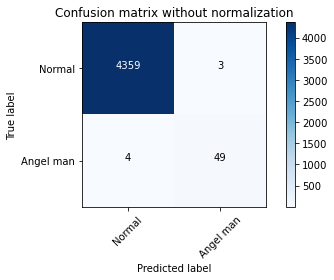

In [71]:
from sklearn.metrics import classification_report, confusion_matrix



cnf_matrix = confusion_matrix(y_test, rfc_predict, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Angel man'],
                      title='Confusion matrix without normalization')

In [72]:
target_names = ['Normal','Angel man']
print(classification_report(y_test, rfc_predict, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      4362
   Angel man       0.94      0.92      0.93        53

    accuracy                           1.00      4415
   macro avg       0.97      0.96      0.97      4415
weighted avg       1.00      1.00      1.00      4415



auc = 0.9619202719887883


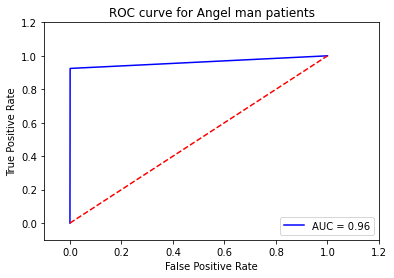

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rfc_predict)
auc = auc(fpr, tpr)
print('auc =', auc)

plt.figure()
plt.title('ROC curve for Angel man patients')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
import pickle

filename = 'C:/Users/HP/Desktop/Data/Angel_Man_RF_model.sav'
pickle.dump(rfc, open(filename, 'wb'))